# Reading BCH/BATCH Files

BCH/BATCH files are created by FEMAG during a calculation. They hold most of the results.
Their values are grouped into different sections such as: Flux, Torque, Machine, dqPar etc.

The actual number of sections as well as their content varyies with the type of calculation.
Currently the following types are supported by femagtools:

* MULTIPLE CALCULATION OF FORCES AND FLUX
* Fast cogging calculation OF FORCES AND FLUX
* Fast LD-LQ-Identification
* Fast Psid-Psiq-Identification
* Fast PM-Synchronous-Motor Simulation
* Characteristics of Permanent-Magnet-Motors


In [1]:
import femagtools.bch
bch = femagtools.bch.read('TEST_002.BCH')

Show the calculation type that created this file

In [2]:
bch.type

'Fast PM-Synchronous-Motor Simulation'

Print the number of torque sections:

In [3]:
len(bch.torque)

3

The PM/Rel machine simulation is executed with a given current and beta angle. 
If the beta angle were 0 then there would be only 2 torque sections.

Lets look at the content of the section machine:

In [4]:
bch.machine

{'mcfile': 'M330-50A',
 'pocfile': './PM_270_L8_8p.poc',
 'p': 4,
 'p_sim': 2,
 'Q': 48,
 'qs_sim': 12,
 'm': 3,
 'num_par_wdgs': 1,
 'fc_radius': 0.08058499999999999,
 'beta': [0.0, -25.0],
 'plfe1': [1463.3809, 1374.8728],
 'plfe2': [71.727, 77.0296],
 'plmag': [4.1524, 15.1965],
 'plcu': [10305.4824, 10305.4824],
 'i1': 250.0,
 'A': 213.2994,
 'J': 39.5526,
 'kcu': 40.0,
 'AJ': 84365.4609,
 'torque': 405.7295,
 'fd': 119.0008,
 'ld': 0.0008625,
 'lq': 0.00132,
 'r1': 0.055,
 'psim': 0.1152,
 'lfe': 0.08356000000000001,
 'n': 50.0,
 'p2': 127463.7,
 'plfe1_0': 172.9209,
 'plfe2_0': 0.7076,
 'plmag_0': 0.0239,
 'eff': 91.5449,
 'pltotal': [11844.7427, 11772.581300000002],
 'plfe': [1535.1079000000002, 1451.9024000000002]}

In the above output we find the 2 beta angles 0 and -25°. The current i1 is 500 A (RMS) and the resulting torque at beta=-25 is 405.7 Nm.

The flux sections contains the fluxes and voltages for all windings and beta angles: 

In [5]:
bch.flux.keys()

dict_keys(['1', '2', '3'])

In [6]:
len(bch.flux['1'])

3

Show all keys of winding '1' flux:

In [7]:
bch.flux['1'][0].keys()

dict_keys(['displ', 'flux_k', 'voltage_dpsi', 'voltage_four', 'current_k', 'voltage_ir', 'displunit'])

Now lets look at some plots

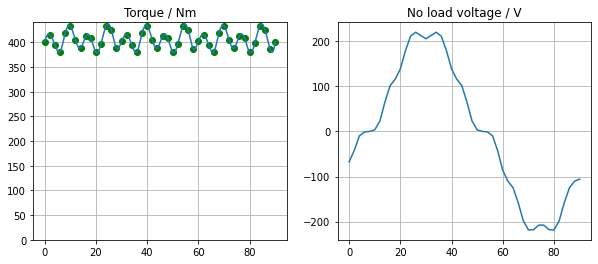

In [8]:
import matplotlib.pyplot as plt
import femagtools.plot

fig = plt.figure(figsize=(10,4))
fig.add_subplot(1,2,1)
femagtools.plot.torque(bch.torque[-1]['angle'], bch.torque[-1]['torque'])
fig.add_subplot(1,2,2)
femagtools.plot.voltage('No load voltage', bch.flux['1'][0]['displ'], 
                             bch.flux['1'][0]['voltage_dpsi'])
plt.show()

A phasor plot

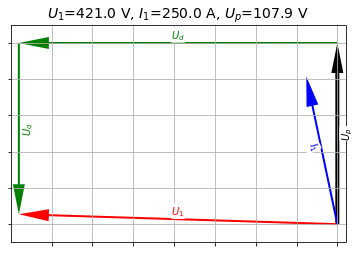

In [9]:
femagtools.plot.phasor(bch)

Or if we want to have a complete report:

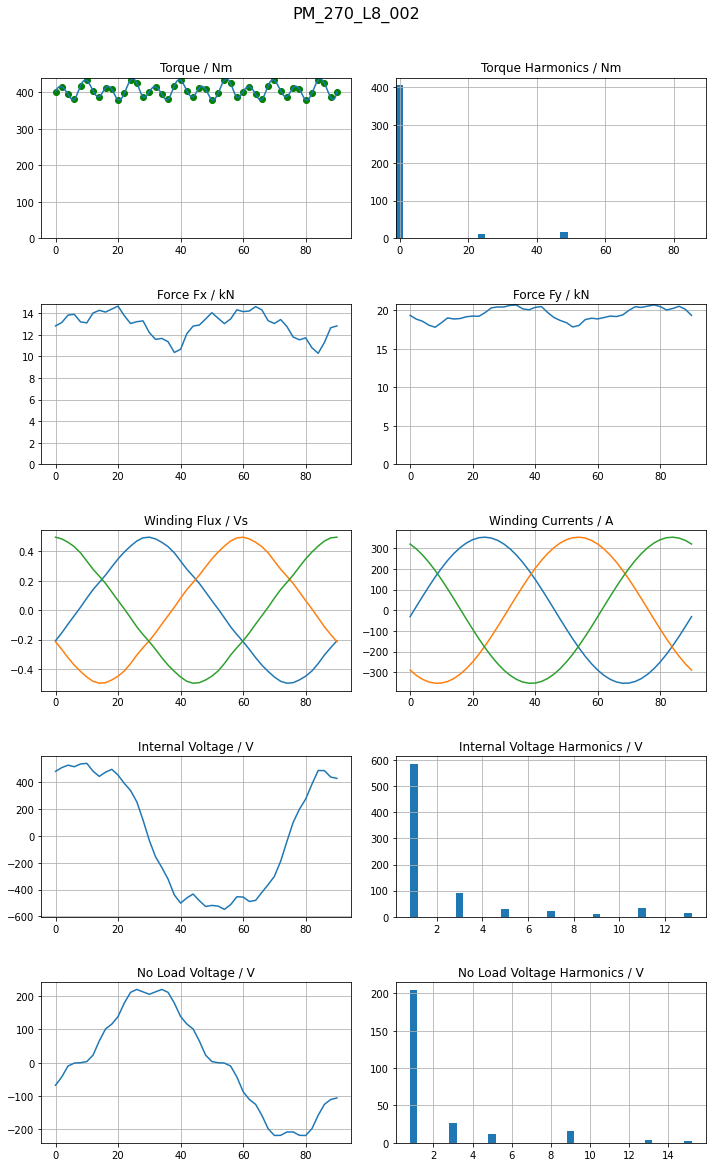

In [10]:
femagtools.plot.pmrelsim(bch, bch.filename)

Read another BCH file and print the torque and beta values:

In [11]:
bch = femagtools.bch.read('LDQ-0-90.BCH')
bch.ldq['torque']

[[-0.0,
  -7.2998016e-06,
  -1.8993188e-05,
  -3.0323924000000002e-05,
  -4.002524e-05],
 [0.0, 42.49026, 111.30192000000001, 178.90196, 237.72820000000002],
 [0.0, 76.60780799999999, 189.26340000000002, 291.70796, 371.50775999999996],
 [0.0, 96.17756, 217.256, 318.86496, 398.24696],
 [0.0, 99.43639999999999, 206.47676, 294.63256, 363.90380000000005],
 [0.0, 88.9914, 174.30616, 244.41299999999998, 299.56260000000003],
 [0.0, 69.872872, 130.18648000000002, 179.15264000000002, 217.92448000000002]]

In [12]:
bch.ldq['beta']

[-90.0, -75.0, -60.0, -45.0, -30.0, -15.0, 0.0]

Create a surface plot of the torque:

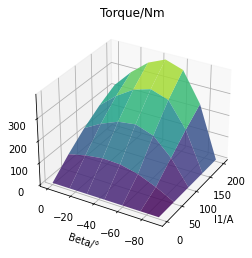

In [13]:
import femagtools.plot
femagtools.plot.i1beta_torque(bch.ldq['i1'], bch.ldq['beta'], bch.ldq['torque'])